# CAT Vehicle circular trajectory replication from Arizona Ring Road Experiment

In this notebook we conduct 21 car simulation by injecting velocity from FollowerStopper ring road experiment (Test 5)

## import required libraries

In [12]:
import sparkle
import os
from sparkle import lane
from sparkle import api
from sparkle import catvehicle
from sparkle import gzstats
homedir = os.path.expanduser("~")
import uuid
import glob
import bagpy
from bagpy import bagreader
import pandas as pd
import signal
import seaborn as sea
import  time
import math
import numpy as np

In [2]:
velocity_folder1 = glob.glob("/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/*.csv")
velocity_folder1 =sorted(velocity_folder1)
velocity_folder1

['/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_01.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_02.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_03.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_04.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_05.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_06.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_07.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_08.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_09.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_10.csv',


In [3]:
velocity_folder = velocity_folder1[17:21] + velocity_folder1[0:17]
velocity_folder

['/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_18.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_19.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_20.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_21.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_01.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_02.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_03.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_04.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_05.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_06.csv',


## declare simulation parameters

In [4]:
datadir = homedir +"/CyverseData/ProjectSparkle/RTFvsNVehicles"
n_vehicles = 21
include_laser = False
circumference = 260
max_update_rate = 100.0 # for gazebo
time_step = 0.01 # for gazebo
leader_vel = 8.0
log_time = 120.0
unique_runid = str(uuid.uuid4())
description = "Circular Trajectory, Unique run ID = " + unique_runid


# 2.82321111
wb = [2.82321111]

for w in wb:
    print("Wheelbase: {}".format(w))
    sim_config = {"n_vehicles":  n_vehicles, 
                  "include_laser": include_laser, 
                  "circumference": circumference,
                  "max_update_rate": max_update_rate, 
                  "time_step": time_step, 
                  "leader_vel": leader_vel,
                  "log_time": log_time, 
                  "description": description,
                  "package_name": "catvehicle",
                  "logdir": datadir, 
                  "wheelbase": w}

    C = catvehicle(**sim_config)
    C.create()
    C.spawn()
    time.sleep(2)

    C.control(leader_vel=leader_vel, logdir = datadir, control_method = "injector", \
             injection_files = velocity_folder, time_col = "Time", vel_col = "Speed")
    C.rviz(C.package_path + "/config/magna_multi.rviz")
    time.sleep(log_time)
    C.destroy(signal.SIGINT)

Wheelbase: 2.82321111
************ Radius of the circle is 41.3802852039 ************
Theta:0.299199300342 radian.
Constant Steering Angle:=0.0681204300119
Sparkle layout instance created.
Number of CPU on this machine: 8
PACKAGE NAME BEING EXECUTED IS catvehicle
... logging to /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/roslaunch-ivory-18805.log
started roslaunch server http://ivory.local:37073/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /gazebo/enable_ros_network: True
 * /rosdistro: melodic
 * /rosversion: 1.14.9
 * /use_sim_time: True

NODES
  /
    gazebo (gazebo_ros/gzserver)

ROS_MASTER_URI=http://localhost:11311
process[gazebo-1]: started with pid [19222]
Empty world launched.
Current  max_update_rate is 100.0
6654feee-15e6-11eb-9142-144f8af0bf40
... logging to /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/roslaunch-ivory-18805.log
6654feee-15e6-11eb-9142-144f8af0bf40
... logging to /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/ros

process[nebula/global_frame_tf_nebula-19]: started with pid [20013]
[nebula/urdf_spawnernebula-11] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/nebula-urdf_spawnernebula-11*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=12.1970531824', 'X:=39.5418752365', 'laser_sensor:=False', 'yaw:=1.86999562714', 'robot:=nebula']
started roslaunch server http://ivory.local:35537/

SUMMARY

PARAMETERS
 * /calista/distanceEstimator/angle_max: 10.0
 * /calista/distanceEstimator/angle_min: -10.0
 * /calista/distanceEstimator/scan_topic: /calista/front_la...
 * /calista/front_left_steering_position_controller/joint: front_left_steeri...
 * /calista/front_left_steering_position_controller/pid/d: 10.0
 * /calista/front_left_steering_position_controller/pid/i: 0.01
 * /calista/front_left_steering_position_controller/pid/p: 100.0
 * /calista/front_left_steering_position_contro

process[zel/base_link2slamodom_tf_zel-42]: started with pid [20623]
process[zel/cmdvel2gazebozel-43]: started with pid [20626]
process[zel/distanceEstimator-44]: started with pid [20632]
process[zel/odom2pathzel-45]: started with pid [20636]
process[zel/global_frame_tf_zel-46]: started with pid [20642]
[zel/urdf_spawnerzel-38] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/zel-urdf_spawnerzel-38*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=38.5198212077', 'X:=15.117915785', 'laser_sensor:=False', 'yaw:=2.76759352816', 'robot:=zel']
started roslaunch server http://ivory.local:33069/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /rosdistro: melodic
 * /rosversion: 1.14.9
 * /use_sim_time: True
 * /zephyr/distanceEstimator/angle_max: 10.0
 * /zephyr/distanceEstimator/angle_min: -10.0
 * /zephyr/distanceEstimator/scan_topic: /zephyr/front_las...
 * /ze

process[zenith/cmdvel2gazebozenith-70]: started with pid [21319]
process[zenith/distanceEstimator-71]: started with pid [21329]
process[zenith/odom2pathzenith-72]: started with pid [21331]
process[zenith/global_frame_tf_zenith-73]: started with pid [21339]
[zenith/urdf_spawnerzenith-65] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/zenith-urdf_spawnerzenith-65*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=35.8363782024', 'X:=-20.690142602', 'laser_sensor:=False', 'yaw:=3.66519142919', 'robot:=zenith']
started roslaunch server http://ivory.local:42225/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /europa/distanceEstimator/angle_max: 10.0
 * /europa/distanceEstimator/angle_min: -10.0
 * /europa/distanceEstimator/scan_topic: /europa/front_las...
 * /europa/front_left_steering_position_controller/joint: front_left_steeri...
 * /europa/front_left_steer

process[herse/base_link2slamodom_tf_herse-96]: started with pid [21814]
process[herse/cmdvel2gazeboherse-97]: started with pid [21816]
process[herse/distanceEstimator-98]: started with pid [21822]
process[herse/odom2pathherse-99]: started with pid [21826]
process[herse/global_frame_tf_herse-100]: started with pid [21834]
[herse/urdf_spawnerherse-92] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/herse-urdf_spawnerherse-92*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=6.1674114818', 'X:=-40.9181016076', 'laser_sensor:=False', 'yaw:=4.56278933021', 'robot:=herse']
started roslaunch server http://ivory.local:45653/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /rosdistro: melodic
 * /rosversion: 1.14.9
 * /thebe/distanceEstimator/angle_max: 10.0
 * /thebe/distanceEstimator/angle_min: -10.0
 * /thebe/distanceEstimator/scan_topic: /thebe/front_lase...
 *

process[himalia/joint_state_publisherhimalia-122]: started with pid [22328]
process[himalia/base_link2slamodom_tf_himalia-123]: started with pid [22334]
process[himalia/cmdvel2gazebohimalia-124]: started with pid [22336]
process[himalia/distanceEstimator-125]: started with pid [22343]
process[himalia/odom2pathhimalia-126]: started with pid [22346]
process[himalia/global_frame_tf_himalia-127]: started with pid [22351]
[himalia/urdf_spawnerhimalia-119] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/himalia-urdf_spawnerhimalia-119*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=-28.1457418769', 'X:=-30.3338955256', 'laser_sensor:=False', 'yaw:=5.46038723124', 'robot:=himalia']
started roslaunch server http://ivory.local:41269/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /kalyke/distanceEstimator/angle_max: 10.0
 * /kalyke/distanceEstimator/angle_min: -

process[arche/robot_state_publisherarche-148]: started with pid [22880]
process[arche/joint_state_publisherarche-149]: started with pid [22881]
process[arche/base_link2slamodom_tf_arche-150]: started with pid [22888]
process[arche/cmdvel2gazeboarche-151]: started with pid [22899]
process[arche/distanceEstimator-152]: started with pid [22900]
process[arche/odom2patharche-153]: started with pid [22906]
process[arche/global_frame_tf_arche-154]: started with pid [22908]
[arche/urdf_spawnerarche-146] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/arche-urdf_spawnerarche-146*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=-41.2645775338', 'X:=3.09235258593', 'laser_sensor:=False', 'yaw:=6.35798513227', 'robot:=arche']
started roslaunch server http://ivory.local:41657/

SUMMARY

PARAMETERS
 * /aitne/distanceEstimator/angle_max: 10.0
 * /aitne/distanceEstimator/ang

process[enceladus/joint_state_publisherenceladus-176]: started with pid [23398]
process[enceladus/base_link2slamodom_tf_enceladus-177]: started with pid [23404]
process[enceladus/cmdvel2gazeboenceladus-178]: started with pid [23406]
process[enceladus/distanceEstimator-179]: started with pid [23413]
process[enceladus/odom2pathenceladus-180]: started with pid [23416]
process[enceladus/global_frame_tf_enceladus-181]: started with pid [23422]
[enceladus/urdf_spawnerenceladus-173] process has finished cleanly
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/enceladus-urdf_spawnerenceladus-173*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=-23.3103446637', 'X:=34.1899961277', 'laser_sensor:=False', 'yaw:=7.25558303329', 'robot:=enceladus']
started roslaunch server http://ivory.local:33967/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /mimas/distanceEstimator/angle_max: 10.0
 * /mimas/d

process[nebula/velinjector_nebula-192]: started with pid [24574]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=nebula', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_19.csv']
Velocity node 1  started.
started roslaunch server http://ivory.local:40107/

SUMMARY

PARAMETERS
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /calista/
    velinjector_calista (sparkle/velinjector.py)

ROS_MASTER_URI=http://localhost:11311
process[calista/velinjector_calista-193]: started with pid [24655]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=calista', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_20.csv']
Velocity n

started roslaunch server http://ivory.local:39511/

SUMMARY

PARAMETERS
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /kalyke/
    velinjector_kalyke (sparkle/velinjector.py)

ROS_MASTER_URI=http://localhost:11311
process[kalyke/velinjector_kalyke-205]: started with pid [25890]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=kalyke', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_11.csv']
Velocity node 14  started.
started roslaunch server http://ivory.local:41123/

SUMMARY

PARAMETERS
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /carpo/
    velinjector_carpo (sparkle/velinjector.py)

ROS_MASTER_URI=http://localhost:11311
process[carpo/velinjector_carpo-206]: started with pid [25991]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-ti

[calista/velinjector_calista-193] escalating to SIGTERM
[calista/velinjector_calista-193] escalating to SIGKILL
Shutdown errors:
 * process[calista/velinjector_calista-193, pid 24655]: required SIGKILL. May still be running.


/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[INFO] [1603537000.465521]: Control for vehicle calista terminated
[calista/global_frame_tf_calista-28] killing on exit
[calista/odom2pathcalista-27] killing on exit
[calista/base_link2slamodom_tf_calista-24] killing on exit
[calista/joint_state_publishercalista-23] killing on exit
[calista/cmdvel2gazebocalista-25] killing on exit
[calista/controller_spawnercalista-21] killing on exit
[calista/distanceEstimator-26] killing on exit
[calista/robot_state_publishercalista-22] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch Terminated.
[proxima/velinjector_proxima-194] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[INFO] [1603537002.142050]: Control for vehicle proxima terminated
[proxima/odom2pathproxima-36] killing on exit
[proxima/global_frame_tf_proxima-37] killing on exit
[proxima/d

/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch Terminated.
[kalyke/velinjector_kalyke-205] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[INFO] [1603537020.005393]: Control for vehicle kalyke terminated
[kalyke/global_frame_tf_kalyke-136] killing on exit
[kalyke/odom2pathkalyke-135] killing on exit
[kalyke/distanceEstimator-134] killing on exit
[kalyke/base_link2slamodom_tf_kalyke-132] killing on exit
[kalyke/robot_state_publisherkalyke-130] killing on exit
[kalyke/cmdvel2gazebokalyke-133] killing on exit
[kalyke/joint_state_publisherkalyke-131] killing on exit
[kalyke/controller_spawnerkalyke-129] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch Terminated.
[carpo/velinjector_carpo-206] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[INFO] [1603537021.147585]: Control for v

[gazebo-1] process has died [pid 19222, exit code -15, cmd /opt/ros/melodic/lib/gazebo_ros/gzserver -e ode /home/ivory/VersionControl/catvehicle_ws/src/catvehicle/worlds/plane.world __name:=gazebo __log:=/home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/gazebo-1.log].
log file: /home/ivory/.ros/log/6654feee-15e6-11eb-9142-144f8af0bf40/gazebo-1*.log


Bag file is still being written. Bytes written: 83946
Bag file is still being written. Bytes written: 78756
Bag file is still being written. Bytes written: 96009
Bag file is still being written. Bytes written: 91735
Bag file is still being written. Bytes written: 91429
Bag file is still being written. Bytes written: 148030
Bag file is still being written. Bytes written: 90209
Bag file is still being written. Bytes written: 91111
Bag file is still being written. Bytes written: 87465
Bag file is still being written. Bytes written: 86082
Bag file is still being written. Bytes written: 74306
Bag file is still being written. Bytes written: 87172
Bag file is still being written. Bytes written: 86388
Bag file is still being written. Bytes written: 85768
Bag file is still being written. Bytes written: 144199
Bag file is still being written. Bytes written: 82561
Bag file is still being written. Bytes written: 81512
Bag file is still being written. Bytes written: 81196
Bag file is still being wr

## Analysis

Retrieving latest bag file
Bag File Recorded Is: catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_120.0_2020-10-24-03-51-03.bag
mkdir STDOUT:('', None)
Renaming GZStat log file [catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_120.0_2020-10-24-03-51-03/catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_120.0_2020-10-24-03-51-03_gzStats.txt] to retain bag file information
mv STDOUT:('', None)


/home/ivory/.local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


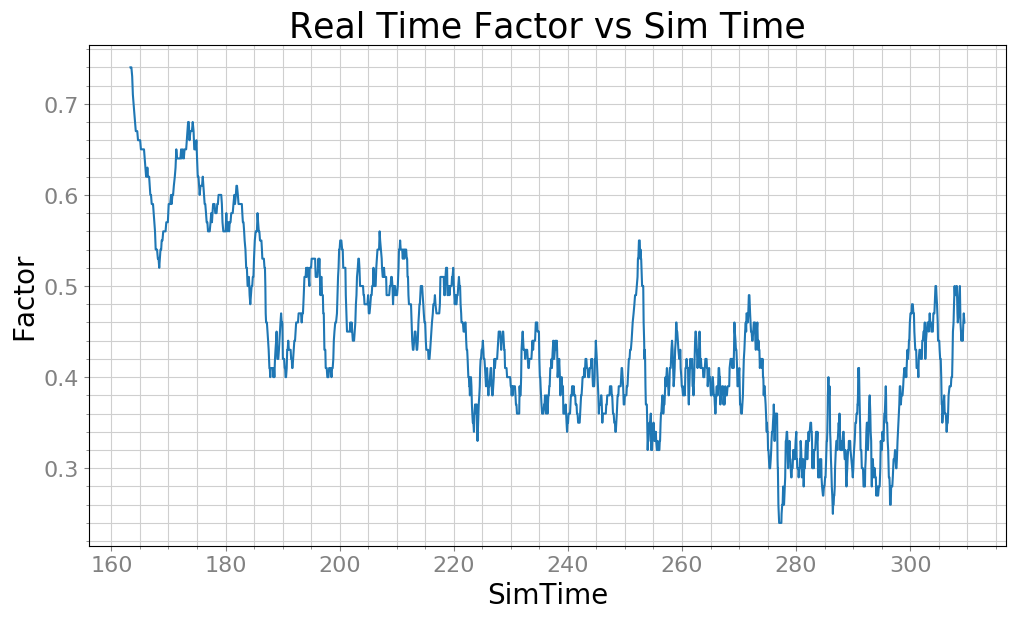

In [5]:
bag = C.latesbag()
gz_stat_file = C.gzstatsfile
GZ = gzstats(gz_stat_file)
GZ.dataframe.to_csv(gz_stat_file[0:-4]+".csv")

fig, ax = bagpy.create_fig(1)
fig.set_figwidth(10)
sea.lineplot(x = 'SimTime', y = 'Factor', data = GZ.dataframe, ax = ax[0])
ax[0].set_title("Real Time Factor vs Sim Time")
fig.show()

In [6]:
b = bagreader(bag)
b.topic_table

[INFO]  Data folder /home/ivory/CyverseData/ProjectSparkle/RTFvsNVehicles/catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_120.0_2020-10-24-03-51-03 already exists. Not creating.


,Topics,Types,Message Count,Frequency
0,/magna/vel,geometry_msgs/Twist,939,None
1,/zel/steering,geometry_msgs/Wrench,865,None
2,/calista/steering,geometry_msgs/Wrench,958,None
3,/europa/path,nav_msgs/Path,99,None
4,/nebula/steering,geometry_msgs/Wrench,950,None
5,/aitne/joint_states,sensor_msgs/JointState,1068,None
6,/zel/path,nav_msgs/Path,68,None
7,/himalia/joint_states,sensor_msgs/JointState,1047,None
8,/statistics,rosgraph_msgs/TopicStatistics,2855,None
9,/himalia/odom,nav_msgs/Odometry,985,None


In [7]:
df_odom = []
b = bagreader(bag)
for nm in C.name:
    print("Car: {}".format(nm))
    setvelfile = b.message_by_topic('/' + nm + '/odom')
    if setvelfile is None:
        continue
    setvel = pd.read_csv(setvelfile)
    df_odom.append(setvel)

[INFO]  Data folder /home/ivory/CyverseData/ProjectSparkle/RTFvsNVehicles/catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_120.0_2020-10-24-03-51-03 already exists. Not creating.
Car: magna
Car: nebula
Car: calista
Car: proxima
Car: zel
Car: zephyr
Car: centauri
Car: zenith
Car: europa
Car: elara
Car: herse
Car: thebe
Car: metis
Car: himalia
Car: kalyke
Car: carpo
Car: arche
Car: aitne
Car: thyone
Car: enceladus
Car: mimas
Car: tethys
No data on the topic:/tethys/odom
Car: lapetus
No data on the topic:/lapetus/odom
Car: dione
No data on the topic:/dione/odom
Car: phoebe
No data on the topic:/phoebe/odom
Car: epimetheus
No data on the topic:/epimetheus/odom
Car: hyperion
No data on the topic:/hyperion/odom
Car: rhea
No data on the topic:/rhea/odom
Car: telesto
No data on the topic:/telesto/odom
Car: deimos
No data on the topic:/deimos/odom
Car: phobos
No data on the topic:/phobos/odom
Car: triton
No data on the topic:/triton/odom
Car: proteus
No data on the 

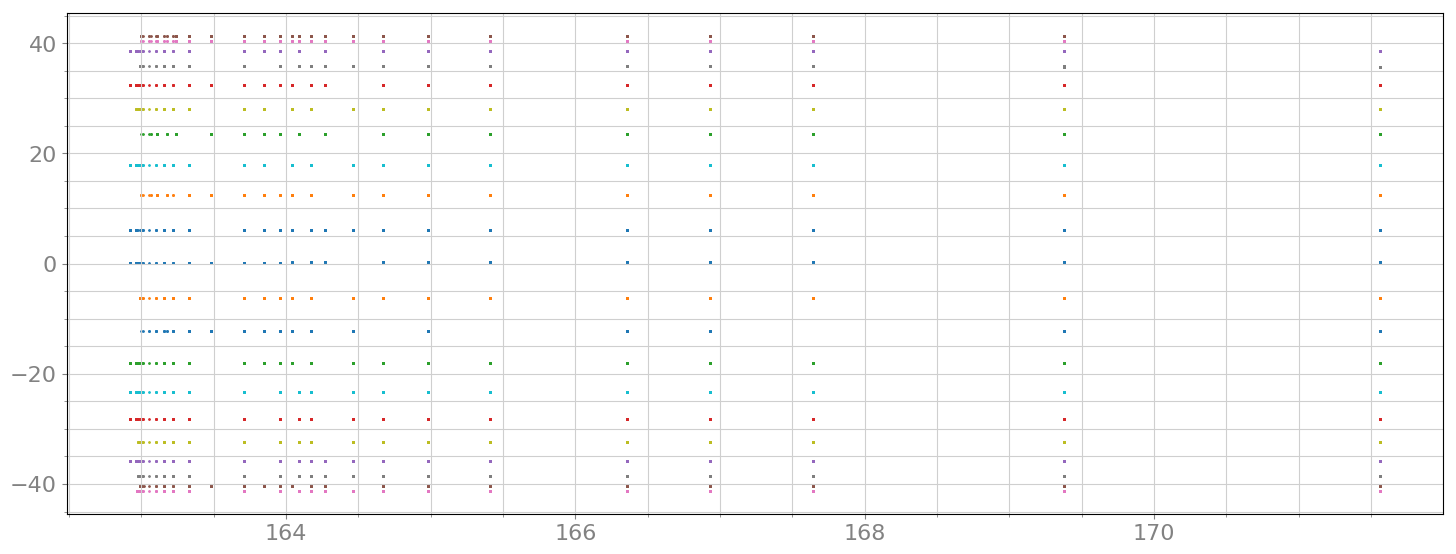

In [8]:
fig, ax = bagpy.create_fig(1)
for df in df_odom:
    ax[0].scatter(x = 'Time', y = 'pose.pose.position.y', data = df, s= 1)
    
fig.show()

In [13]:
C_init_straight = []
for i in range(0, 21):
    theta = math.atan2(C.Y[i], C.X[i])
    
    straight_len = C.R*(theta)
    
    if theta < 0.0:
        theta2 = theta + np.pi
        straight_len = C.R*(theta2)
        straight_len = straight_len + np.pi*C.R
    print(straight_len)
    
        
    C_init_straight.append(straight_len)

    

0.0
12.380952381
24.7619047619
37.1428571429
49.5238095238
61.9047619048
74.2857142857
86.6666666667
99.0476190476
111.428571429
123.80952381
136.19047619
148.571428571
160.952380952
173.333333333
185.714285714
198.095238095
210.476190476
222.857142857
235.238095238
247.619047619


In [14]:
for i, df in enumerate(df_odom):
    df['distance_per_step'] = 0
    distance_per_step = [C_init_straight[i]]
    df['distance'] = 0
    sum = C_init_straight[i]
    cum_sum = [C_init_straight[i]]
    for index, row in df.iloc[1:].iterrows():

        x = df['pose.pose.position.x'][index]
        y = df['pose.pose.position.y'][index]

        x_old = df['pose.pose.position.x'][index-1]
        y_old = df['pose.pose.position.y'][index-1]
        if np.abs(y) < 0.0001:
            y = 0
        if np.abs(x) < 0.0001:
            x = 0

        if np.abs(y_old) < 0.0001:
            y_old = 0
        if np.abs(x_old) < 0.0001:
            x_old = 0


        theta = math.atan2(y, x)
        theta_old = math.atan2(y_old, x_old)
        d_per_step = C.R*(np.abs(theta - theta_old))
        distance_per_step.append(d_per_step)
        sum = sum + d_per_step
        sum = sum%260
        cum_sum.append(sum)

    df['distance_per_step'] =distance_per_step
    df['distance'] = cum_sum
    

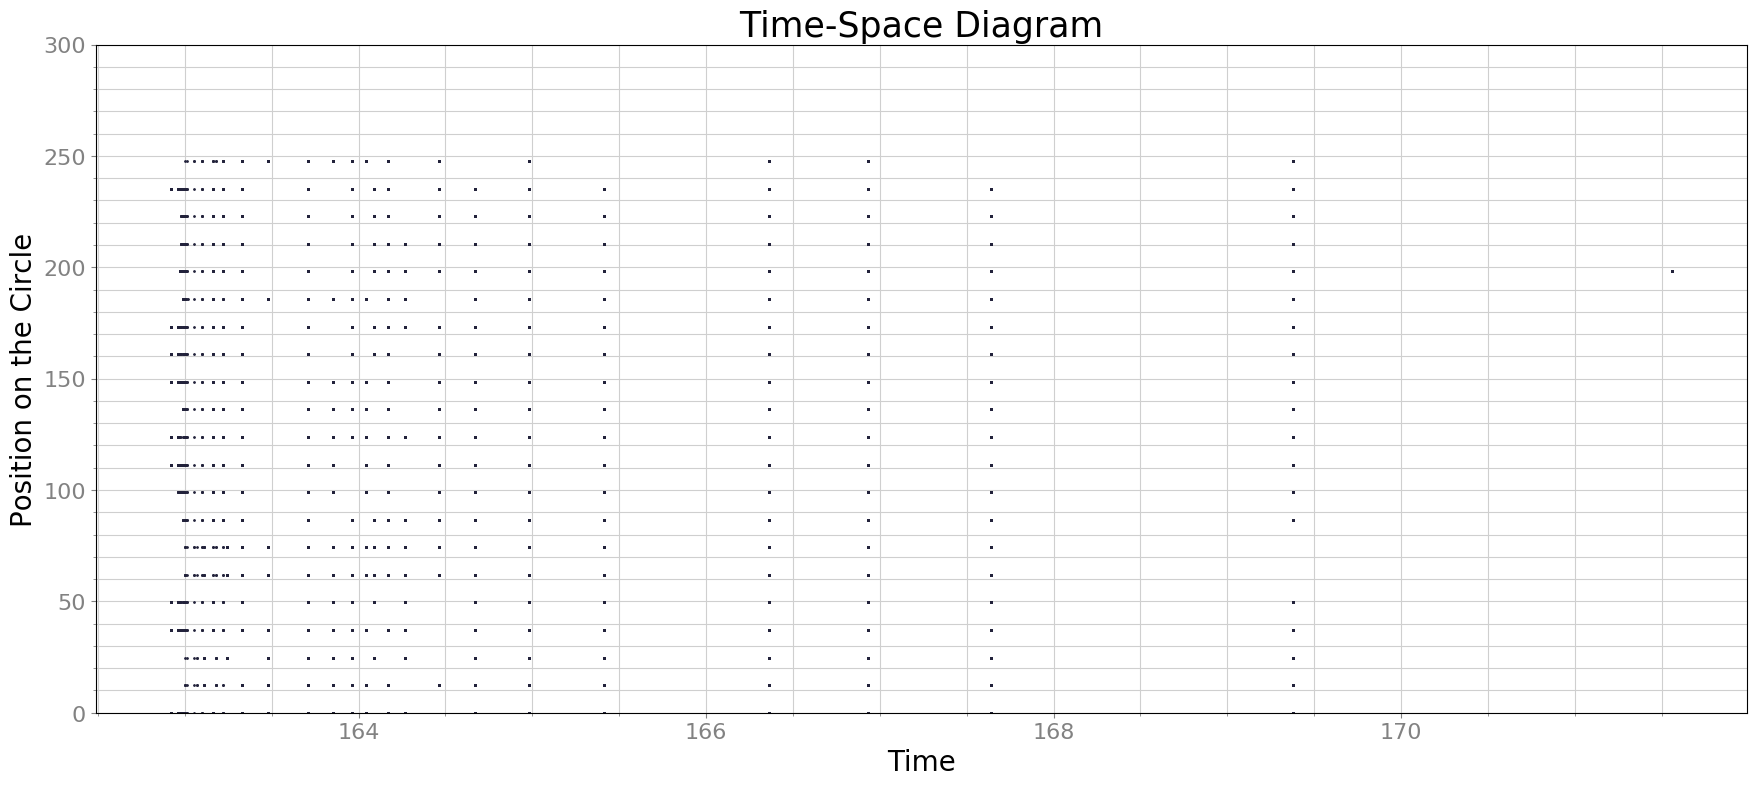

In [15]:
fig, ax = bagpy.create_fig(1)
fig.set_figwidth(18)
fig.set_figheight(8)
for i, df in enumerate(df_odom):
    df = df.iloc[:-300]
    ax[0].plot(df['Time'], df['distance'], linewidth = 0, marker = '.', label = C.name[i],markersize = 2, 
              color = '#22223b')
    #ax[0].scatter(x = 'Time', y = 'distance', data = df, s= 1, label = C.name[i])
    
    
#ax[0].legend(fontsize = 20, ncol = 6, markerscale = 4)
ax[0].set_ylim(0, 300)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Position on the Circle')
ax[0].set_title('Time-Space Diagram')
fig.show()


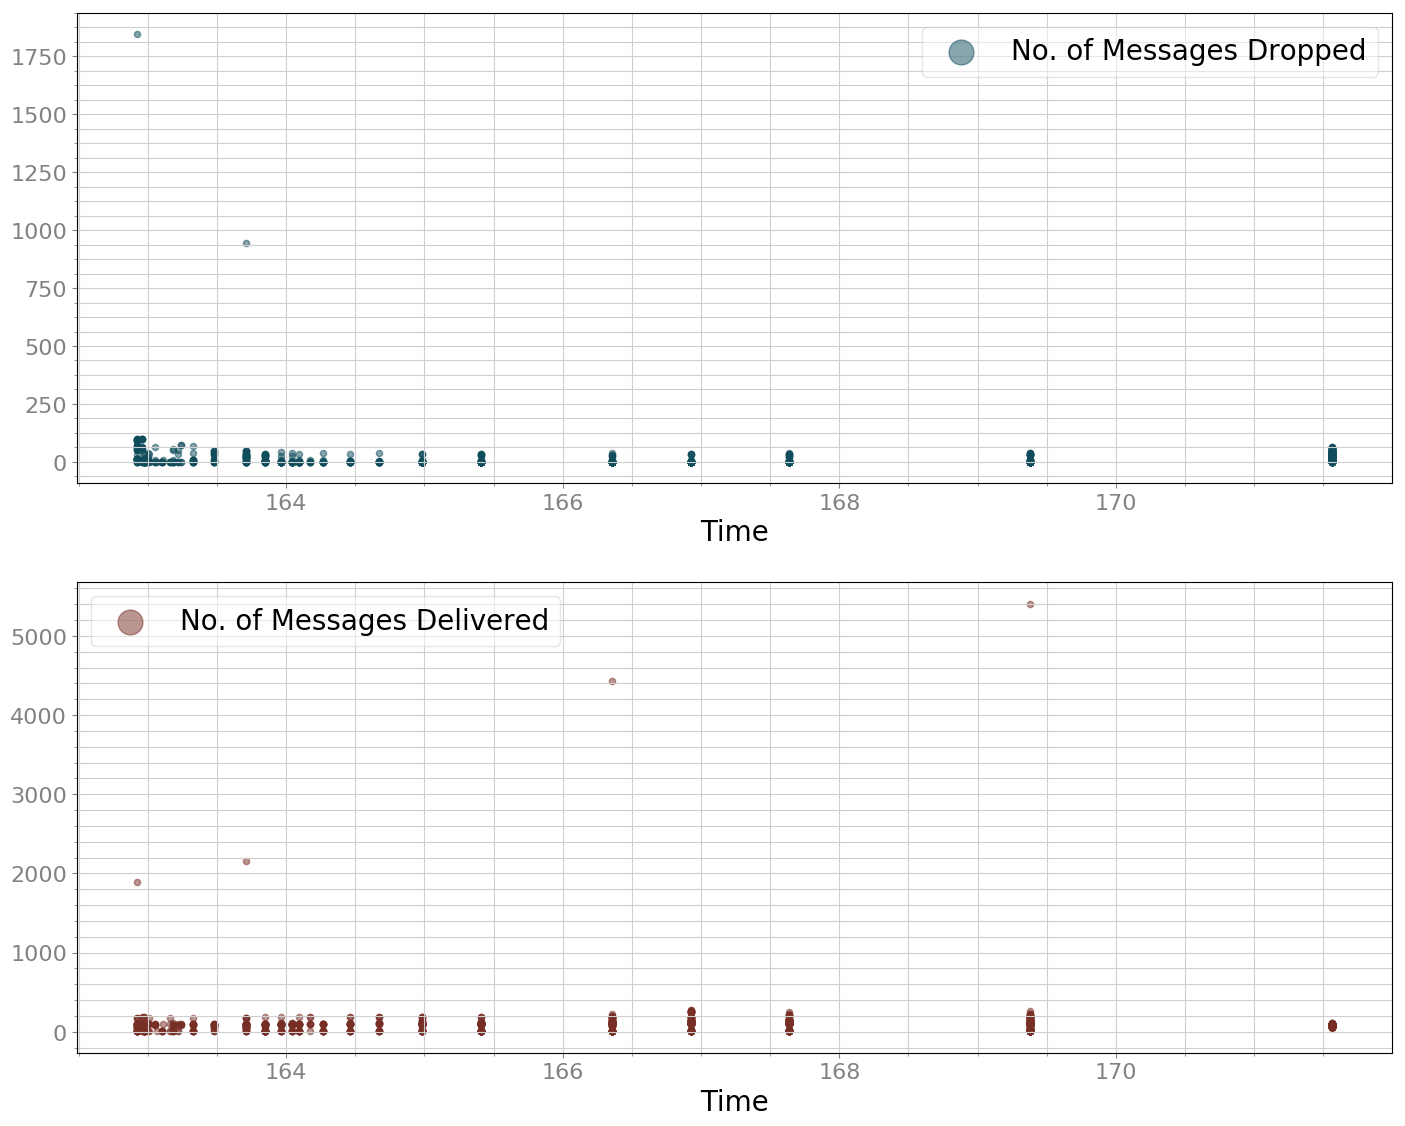

In [16]:
statistics_file = b.message_by_topic('/statistics')
statistics = pd.read_csv(statistics_file)
fig, ax = bagpy.create_fig(2)
ax[0].scatter(x = 'Time', y = 'dropped_msgs', data =statistics, label = 'No. of Messages Dropped', alpha = 0.5, s = 20, c = '#0f4c5c')
ax[1].scatter(x = 'Time', y = 'delivered_msgs', data =statistics, label = 'No. of Messages Delivered',alpha = 0.5,  s = 20, c = '#772e25')
ax[0].legend(markerscale = 4, fontsize = 20)
ax[1].legend(markerscale = 4, fontsize = 20)
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

fig.show()